In [1]:
import argparse
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import torch

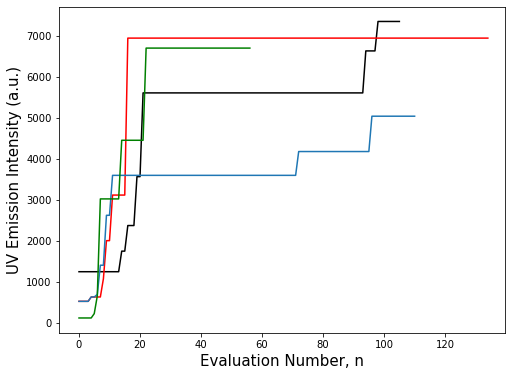

In [3]:
# optimization progress: result of each iteration and best results
# to compare optimizations with the same initial dataset but different beta values
DATA_DEST1 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5.csv"
DATA_DEST2 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5_2.csv"
DATA_DEST3 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5_3.csv"
DATA_DEST4 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5_4.csv"


df1 = pd.read_csv(DATA_DEST1)
df2 = pd.read_csv(DATA_DEST2)
df3 = pd.read_csv(DATA_DEST3)
df4 = pd.read_csv(DATA_DEST4)

def get_MaxSoFar(df):
    evalued = len(df)
    max_ems = []
    for i in range(evalued):
        max_ems.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_ems)) 
    return x, max_ems

x1, y1 = get_MaxSoFar(df1)
x2, y2 = get_MaxSoFar(df2)
x3, y3 = get_MaxSoFar(df3)
x4, y4 = get_MaxSoFar(df4)


fig, ax = plt.subplots(figsize=(8, 6))

l1=ax.plot(x1[:-9], y1[9:], c='black', alpha = 1, label='initial dataset 1')
l2=ax.plot(x2[:-9], y2[9:], c='r', alpha = 1, label='initial dataset 2')
l3=ax.plot(x3[:-9], y3[9:], alpha = 1, label='initial dataset 3')
l4=ax.plot(x4[:-9], y4[9:], c='green', alpha = 1, label='initial dataset 4')

FontSize = 15

ax.set_xlabel('Evaluation Number, n', fontsize = FontSize)
ax.set_ylabel('UV Emission Intensity (a.u.)', fontsize = FontSize)

#ax2.tick_params(axis='y', color='r')
#ax2.spines['right'].set_color('red') 
#plt.setp(ax2.get_yticklabels(), visible=False)
x = range(max(len(x1)-10,len(x2)-10,len(x3)-10))
# plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([x[0]-x[-1]*0.05,x[-1]+x[-1]*0.05])
plt.show()


In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def showNP_YbEr(temp):   
    fig, ax = plt.subplots()
    ax.axis('equal')
    labels=["Yb", "Er", "Tm", "Y"]
    cm = colors.ListedColormap(['#D5BB67', '#E3A39A','#78ACA8', '#E7E7E7','#20425B'])
    cmap = cm([0,1,2,3,4])

    yttrium1 = 1- temp.yb_1 - temp.er_1 
    yttrium2 = 1- temp.yb_2 - temp.er_2 
    #pie_surface, _ = ax.pie([0, 0, 0, 0,1], radius=40/34, colors = cmap)
    pie_shell, _ = ax.pie([temp.yb_2,temp.er_2,0, round(yttrium2,3),0], radius=1, colors = cmap)
    pie_core, _ = ax.pie([temp.yb_1,temp.er_1,0, round(yttrium1,3),0], radius =temp.radius/34, colors = cmap)
    plt.setp(pie_core,edgecolor='white')
    plt.setp(pie_shell,edgecolor='white')
    plt.show()
    return fig
    


107
7349.999124
yb_1              0.933000
er_1              0.067000
yb_2              0.000000
er_2              0.000000
radius           23.000000
UV             7349.999124
VIS           12087.498683
BLUE           1881.249815
GREEN          2931.249663
RED            5556.249397
TOTAL         19824.997756
ABSORPTION    51906.244170
qe                0.013388
Name: 107, dtype: float64


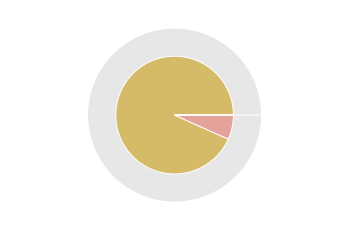

In [14]:
df = df1
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i].UV)
    print(df.iloc[i])
    fig=showNP_YbEr(df.iloc[i])
    fig.savefig('bestYbEr.pdf')

25
6943.748809
yb_1              0.980000
er_1              0.020000
yb_2              0.000000
er_2              0.000000
radius           17.000000
UV             6943.748809
VIS            5868.749023
BLUE            862.499861
GREEN          1137.499806
RED            1874.999681
TOTAL         13337.497722
ABSORPTION    48812.491758
qe                0.026362
Name: 25, dtype: float64


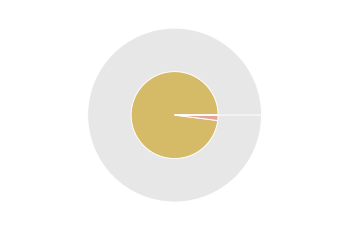

In [8]:
df = df2
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i].UV)
    print(df.iloc[i])
    fig=showNP_YbEr(df.iloc[i])

105
5037.49906
yb_1              0.899000
er_1              0.101000
yb_2              0.000000
er_2              0.000000
radius           21.000000
UV             5037.499060
VIS            9837.498166
BLUE           1399.999743
GREEN          2706.249521
RED            4856.249075
TOTAL         15362.497136
ABSORPTION    29387.494650
qe                0.014368
Name: 105, dtype: float64


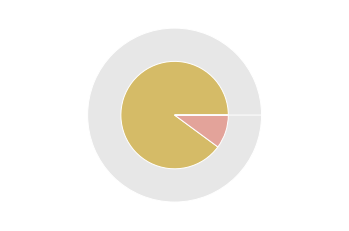

In [9]:
df = df3
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i].UV)
    print(df.iloc[i])
    fig=showNP_YbEr(df.iloc[i])

31
6699.999693
yb_1              0.959000
er_1              0.041000
yb_2              0.005000
er_2              0.000000
radius           27.000000
UV             6699.999693
VIS           10274.999578
BLUE           1962.499916
GREEN          2587.499898
RED            4262.499827
TOTAL         17774.999228
ABSORPTION    90124.996314
qe                0.007073
Name: 31, dtype: float64


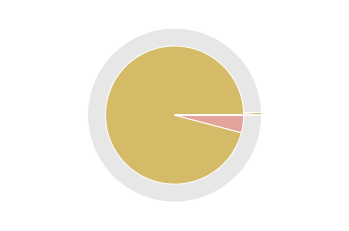

In [10]:
df = df4
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i].UV)
    print(df.iloc[i])
    fig=showNP_YbEr(df.iloc[i])

In [41]:
y1 = df1.iloc[df1.UV.nlargest(1).index[0]].yb_1
y2 = df2.iloc[df2.UV.nlargest(1).index[0]].yb_1
y3 = df3.iloc[df3.UV.nlargest(1).index[0]].yb_1
y4 = df4.iloc[df4.UV.nlargest(1).index[0]].yb_1
YB_1 = [y1,y2,y3,y4]
#statistics.mean(YB_1), statistics.stdev(YB_1)
print(f'yb_1 mean = {statistics.mean(YB_1)}, stdev = {statistics.stdev(YB_1)}')

yb_1 mean = 0.94275, stdev = 0.034932076949417114


In [42]:
y1 = df1.iloc[df1.UV.nlargest(1).index[0]].yb_2
y2 = df2.iloc[df2.UV.nlargest(1).index[0]].yb_2
y3 = df3.iloc[df3.UV.nlargest(1).index[0]].yb_2
y4 = df4.iloc[df4.UV.nlargest(1).index[0]].yb_2
YB_1 = [y1,y2,y3,y4]
#statistics.mean(YB_1), statistics.stdev(YB_1)
print(f'yb_2 mean = {statistics.mean(YB_1)}, stdev = {statistics.stdev(YB_1)}')

yb_2 mean = 0.00125, stdev = 0.0025


In [43]:
y1 = df1.iloc[df1.UV.nlargest(1).index[0]].er_2
y2 = df2.iloc[df2.UV.nlargest(1).index[0]].er_2
y3 = df3.iloc[df3.UV.nlargest(1).index[0]].er_2
y4 = df4.iloc[df4.UV.nlargest(1).index[0]].er_2
YB_1 = [y1,y2,y3,y4]
#statistics.mean(YB_1), statistics.stdev(YB_1)
print(f'er_2 mean = {statistics.mean(YB_1)}, stdev = {statistics.stdev(YB_1)}')

er_2 mean = 0.0, stdev = 0.0


In [44]:
y1 = df1.iloc[df1.UV.nlargest(1).index[0]].er_1
y2 = df2.iloc[df2.UV.nlargest(1).index[0]].er_1
y3 = df3.iloc[df3.UV.nlargest(1).index[0]].er_1
y4 = df4.iloc[df4.UV.nlargest(1).index[0]].er_1
YB_1 = [y1,y2,y3,y4]
#statistics.mean(YB_1), statistics.stdev(YB_1)
print(f'er_1 mean = {statistics.mean(YB_1)}, stdev = {statistics.stdev(YB_1)}')

er_1 mean = 0.05725, stdev = 0.03493207694941714


In [45]:
y1 = df1.iloc[df1.UV.nlargest(1).index[0]].radius
y2 = df2.iloc[df2.UV.nlargest(1).index[0]].radius
y3 = df3.iloc[df3.UV.nlargest(1).index[0]].radius
y4 = df4.iloc[df4.UV.nlargest(1).index[0]].radius
YB_1 = [y1,y2,y3,y4]
#statistics.mean(YB_1), statistics.stdev(YB_1)
print(f'radius mean = {statistics.mean(YB_1)}, stdev = {statistics.stdev(YB_1)}')

radius mean = 22.0, stdev = 4.163331998932265


In [5]:
import statistics
def stupid_stderr(x_list, y_list):
    mydict = {}
    for x, y in sorted(zip(x_list, y_list), key=lambda pair: pair[0]):
        if x not in mydict:
            mydict[x] = [y]
        else:
            mydict[x].append(y)
    xs = []
    ys = []
    std = []
    for key, value in mydict.items():
        xs.append(key)
        ys.append(sum(value) / len(value))
        std.append(statistics.pstdev(value)/len(value))
    return np.array(xs), np.array(ys), np.array(std)
def stupid_stddev(x_list, y_list):
    mydict = {}
    for x, y in sorted(zip(x_list, y_list), key=lambda pair: pair[0]):
        if x not in mydict:
            mydict[x] = [y]
        else:
            mydict[x].append(y)
    xs = []
    ys = []
    std = []
    for key, value in mydict.items():
        xs.append(key)
        ys.append(sum(value) / len(value))
        std.append(statistics.pstdev(value))
    return np.array(xs), np.array(ys), np.array(std)
def plot_optimization_std(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].UV.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, std = stupid_stddev(log_step,log_result)
    return step, mean, std
def plot_optimization_stderr(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].UV.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, stderr = stupid_stderr(log_step,log_result)
    return step, mean, stderr
def plot_optimization_stddev(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].UV.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, std = stupid_stddev(log_step,log_result)
    return step, mean, std
def plot_optimization_std_VIS(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].VIS.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, std = stupid_stddev(log_step,log_result)
    return step, mean, std
def plot_optimization_stderr_VIS(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].VIS.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, stderr = stupid_stderr(log_step,log_result)
    return step, mean, stderr

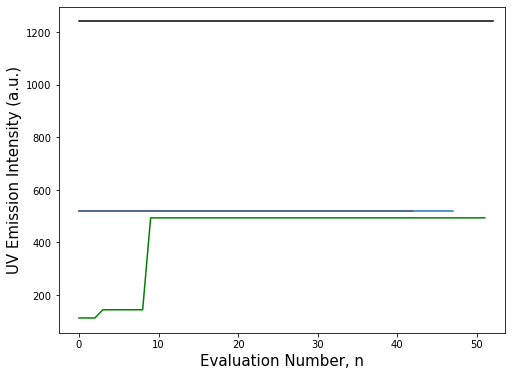

In [4]:

# optimization progress: result of each iteration and best results
# to compare optimizations with the same initial dataset but different beta values
DATA_DEST1 = "./../saved_data/simulation_log_YbEr_UV_logEmission_RS_1.csv"
DATA_DEST2 = "./../saved_data/simulation_log_YbEr_UV_logEmission_RS_2.csv"
DATA_DEST3 = "./../saved_data/simulation_log_YbEr_UV_logEmission_RS_3.csv"
DATA_DEST4 = "./../saved_data/simulation_log_YbEr_UV_logEmission_RS_4.csv"



rs1 = pd.read_csv(DATA_DEST1)
rs2 = pd.read_csv(DATA_DEST2)
rs3 = pd.read_csv(DATA_DEST3)
rs4 = pd.read_csv(DATA_DEST4)

def get_MaxSoFar(df):
    evalued = len(df)
    max_ems = []
    for i in range(evalued):
        max_ems.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_ems)) 
    return x, max_ems

x1, y1 = get_MaxSoFar(rs1)
x2, y2 = get_MaxSoFar(rs2)
x3, y3 = get_MaxSoFar(rs3)
x4, y4 = get_MaxSoFar(rs4)


fig, ax = plt.subplots(figsize=(8, 6))

l1=ax.plot(x1[:-9], y1[9:], c='black', alpha = 1, label='initial dataset 1')
l2=ax.plot(x2[:-9], y2[9:], c='r', alpha = 1, label='initial dataset 2')
l3=ax.plot(x3[:-9], y3[9:], alpha = 1, label='initial dataset 3')
l4=ax.plot(x4[:-9], y4[9:], c='green', alpha = 1, label='initial dataset 4')

FontSize = 15

# # Ask matplotlib for the plotted objects and their labels. 
# # This is to make labels of ax1 and ax2 show in one legend.
# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='lower right', ncol=2, fontsize = 13, frameon = True)


ax.set_xlabel('Evaluation Number, n', fontsize = FontSize)
ax.set_ylabel('UV Emission Intensity (a.u.)', fontsize = FontSize)

#ax2.tick_params(axis='y', color='r')
#ax2.spines['right'].set_color('red') 
#plt.setp(ax2.get_yticklabels(), visible=False)
x = range(max(len(x1)-10,len(x2)-10,len(x3)-10))
# plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([x[0]-x[-1]*0.05,x[-1]+x[-1]*0.05])
plt.show()


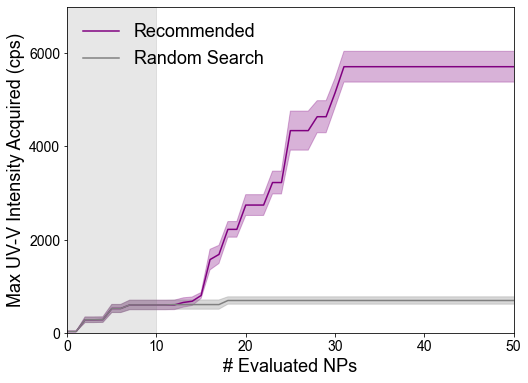

In [9]:
plt.rcParams["font.family"] = "arial"

#c1 = '#4b0082'
c1 = 'purple'
df_list = [df1,df2,df3,df4]
rs_list = [rs1,rs2,rs3,rs4]

FontSize = 18
ticksize = 14
fig, ax1 = plt.subplots(figsize=(8,6))

x,y,stderr = plot_optimization_stderr(df_list)
plt.plot(x,y,c=c1,label='Recommended')
plt.fill_between(x, y-stderr, y+stderr, color=c1,alpha=0.3)

x_rs,y_rs,stderr_rs = plot_optimization_stderr(rs_list)
plt.plot(x_rs,y_rs,c='grey',label='Random Search')
plt.fill_between(x_rs, y_rs-stderr_rs, y_rs+stderr_rs, color='grey',alpha=0.3)


plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('Max UV-V Intensity Acquired (cps)', fontsize = FontSize)
plt.xlim([0,50])
plt.ylim([0,7000])
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
# plt.savefig('YbEr_opt_progress.eps') 
plt.legend(loc='upper left', fontsize = FontSize,frameon=False)
plt.savefig('YbEr_opt_progress_with_RS_forPPT.pdf') 


In [10]:
start = 10
end = 30
print(f'UV step {start}: {y[start]}+/-{stderr[start]}')
print(f'UV step {end}: {y[end]}+/-{stderr[end]}')
print(f'UV ratio = {y[end]/y[start]}')
print(f'UV diff = {y[end]-y[start]}\n')


UV step 10: 597.9160330000001+/-101.74864530101043
UV step 30: 693.2283372500001+/-79.20134310377068
UV ratio = 1.1594075070570988
UV diff = 95.31230425000001



# Histgram

In [24]:
def plot_hist_uv(df_list):
    ems=[] # the list to save results of each trials

    for df in df_list:
        for i in range(len(df)):
            ems.append(df.iloc[i].UV)
    return ems

In [25]:
# load random search dataset
DATA_DEST = "./../saved_data/simulation_log_from_gsheet.csv"
df_rs = pd.read_csv(DATA_DEST)
df_rs = df_rs[:300] # only the first 300 sims are from RS
# df_shuff = df_rs.sample(n=187)
# df_shuff


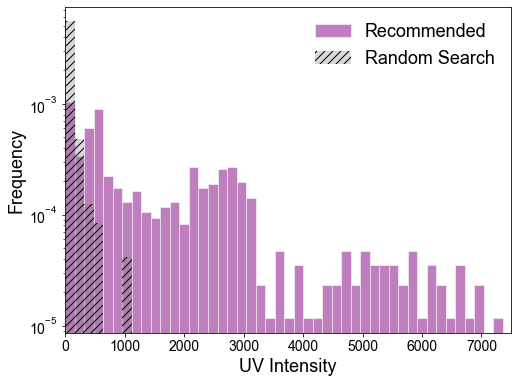

In [31]:
df_list1 = [df1[10:],df2[10:],df3[10:],df4[10:],df5[10:]]
opt_ems = plot_hist_uv(df_list1)
df_list2 = [df_rs]
init_ems = plot_hist_uv(df_list2)

FontSize = 18
ticksize = 14

bins = np.linspace(0, 8000, 51)

fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = plt.hist(opt_ems, bins=bins, alpha=0.5, color = 'purple', edgecolor = 'white', label='Recommended', density = True)
n, bins, patches = plt.hist(init_ems, bins=bins, alpha=0.3, color = 'grey',  hatch='///', label='Random Search', density = True)
plt.xlabel('UV Intensity', fontsize = FontSize)
plt.ylabel('Frequency', fontsize = FontSize)
plt.legend(loc='upper right', fontsize = FontSize,frameon=False)
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlim([-10,7500])

plt.yscale("log")
 
plt.savefig('intensity_hist.pdf')
#plt.savefig('intensity_hist.png')






In [36]:
df_list1 = [df1[10:],df2[10:],df3[10:],df4[10:],df5[10:]]
df_1 = pd.concat(df_list1)
df_2 = df_rs







In [39]:
recommend = df_1[df_1.UV >= 1000].count()
recommend

yb_1          242
er_1          242
yb_2          242
er_2          242
radius        242
UV            242
VIS           242
BLUE          242
GREEN         242
RED           242
TOTAL         242
ABSORPTION    242
qe            242
dtype: int64

In [40]:
df_1.count()

yb_1          516
er_1          516
yb_2          516
er_2          516
radius        516
UV            516
VIS           516
BLUE          516
GREEN         516
RED           516
TOTAL         516
ABSORPTION    516
qe            516
dtype: int64

In [41]:
242/516

0.4689922480620155

In [46]:
rs = df_2[df_2.UV >= 1000].count()
rs

yb_1          1
er_1          1
yb_2          1
er_2          1
radius        1
UV            1
VIS           1
BLUE          1
GREEN         1
RED           1
TOTAL         1
ABSORPTION    1
qe            1
dtype: int64

In [44]:
df_2.count()

yb_1          300
er_1          300
yb_2          300
er_2          300
radius        300
UV            300
VIS           300
BLUE          300
GREEN         300
RED           300
TOTAL         300
ABSORPTION    300
qe            300
dtype: int64

In [47]:
1/300

0.0033333333333333335